## Fragmentation vs C to T 

In this script, we seek answers to the question by exploratory analysis, how the C to T changes are related to fragment lengths and can we attribute these changes to sonication, sequencing error, or damages caused by preservation or handling of the DNA. 

We start with an ancient DNA sample from John Lindo's data.

### Ancient DNA (John Lindo) - Example

In [1]:
dir <- "../data/Lindo2016ancients/";

In [2]:
tab <- read.csv("../data/Lindo2016ancients/181_all_chr.q30.csv", header=FALSE)

In [3]:
dim(tab)

[1] 1135066       4

In [4]:
head(tab)

V1       V2 V3 V4
1 TAG->ATT 34 65 6 
2 CCT->CGG 54 19 3 
3 AAC->TTT 31 64 1 
4 AAT->CCG 74 22 3 
5 GCG->ATG 40 41 2 
6 AAG->AAG 56 19 1

In [5]:
read_length <- tab$V2 + tab$V3

In [6]:
indices <- grep("C->T", tab$V1)
pos_CtoT <- pmin(tab[indices, ]$V2, tab[indices, ]$V3)
read_length_CtoT <- tab[indices, ]$V2 + tab[indices, ]$V3

In [7]:
mean(read_length)
mean(pos_CtoT)

[1] 83.71705

[1] 22.41963

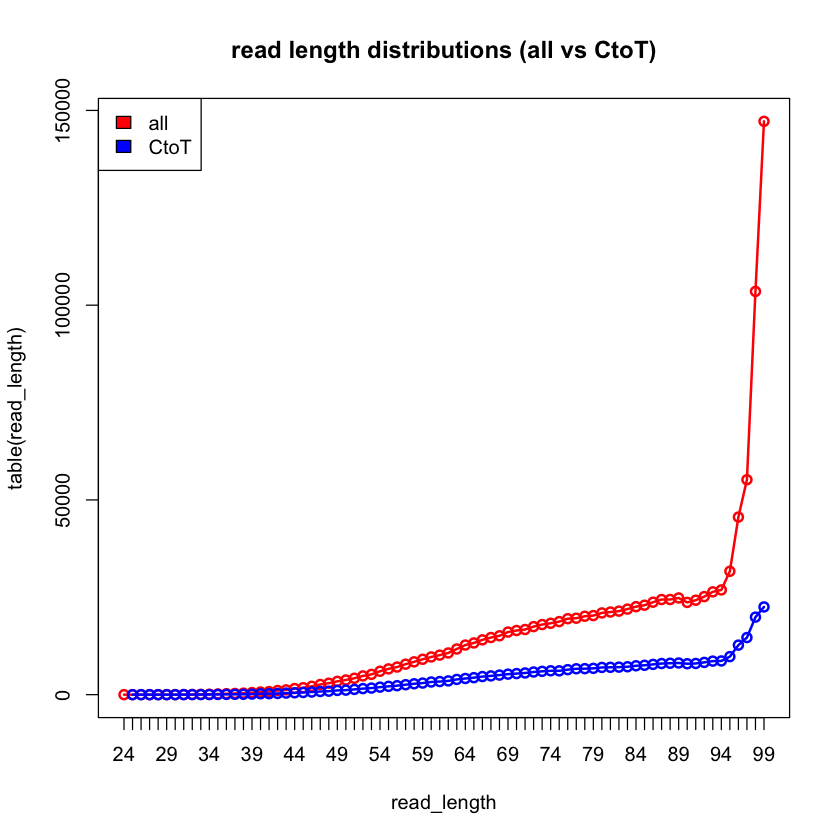

In [8]:
plot(table(read_length), type="o", col="red", main="read length distributions (all vs CtoT)")
points(table(read_length_CtoT), type="o", col="blue")
legend("topleft", fill=c("red", "blue"), legend = c("all", "CtoT"))

In [9]:
indices <- grep("C->T", tab$V1)
indices <- c(indices, grep("G->A", tab$V1))

In [10]:
table(tab$V2)


    3     4     5     6     7     8     9    10    11    12    13    14    15 
15550 16064 15066 14517 14907 14069 14492 13614 14534 15289 13827 14158 13961 
   16    17    18    19    20    21    22    23    24    25    26    27    28 
13443 13706 13616 13657 13783 14285 14659 14152 15368 14819 15186 15465 15206 
   29    30    31    32    33    34    35    36    37    38    39    40    41 
15446 15024 16106 15417 15472 15415 15250 15560 15448 15459 15377 15538 15397 
   42    43    44    45    46    47    48    49    50    51    52    53    54 
15306 15295 17025 15143 14869 14989 14817 14699 14875 14465 14194 14362 14280 
   55    56    57    58    59    60    61    62    63    64    65    66    67 
13814 13607 13354 13308 12885 12774 12321 12222 11937 11837 11495 11280 11241 
   68    69    70    71    72    73    74    75    76    77    78    79    80 
10787 10562 10156  9992  9802 10355  9049  8815  8552  8345  7891  7718  7316 
   81    82    83    84    85    86    87    88    

In [11]:
table(tab$V3)


    2     3     4     5     6     7     8     9    10    11    12    13    14 
 6424 16891 16141 15264 15333 15224 14326 14684 13932 14624 15175 13606 14129 
   15    16    17    18    19    20    21    22    23    24    25    26    27 
14026 13495 13562 13561 13775 13771 14363 14642 14507 15395 14873 15256 15284 
   28    29    30    31    32    33    34    35    36    37    38    39    40 
14877 15544 15104 15948 15159 15270 15386 15345 15558 15294 15481 15215 15529 
   41    42    43    44    45    46    47    48    49    50    51    52    53 
15513 15409 15148 16931 15138 14907 14869 14948 14696 14677 14345 14123 14185 
   54    55    56    57    58    59    60    61    62    63    64    65    66 
14319 13664 13368 13459 13082 13041 12754 12329 12222 11701 11547 11299 11173 
   67    68    69    70    71    72    73    74    75    76    77    78    79 
11004 10490 10191  9917  9637  9534 10133  8910  8693  8322  8109  7700  7541 
   80    81    82    83    84    85    86    87    

In [12]:
indices2 <- which(tab$V2 < 5 | tab$V3 < 5)
length(indices2)

[1] 71070

In [13]:
length(grep("G->A", tab$V1))

[1] 331672

In [14]:
length(grep("C->T", tab$V1))

[1] 326879

In [15]:
indices_matched <- intersect(indices, indices2)

In [16]:
length(indices_matched)
read_length_3 <- (tab[indices_matched, ]$V2 + tab[indices_matched, ]$V3)
table(read_length_3)

[1] 41864

read_length_3
  25   26   27   28   30   31   32   33   34   35   36   37   38   39   40   41 
   1    2    4    1    3    8   10   14   20   32   43   53   55   81  103  120 
  42   43   44   45   46   47   48   49   50   51   52   53   54   55   56   57 
 143  161  189  224  278  288  296  322  350  401  416  432  476  524  527  563 
  58   59   60   61   62   63   64   65   66   67   68   69   70   71   72   73 
 572  585  614  608  645  665  735  752  767  767  785  844  791  822  812  833 
  74   75   76   77   78   79   80   81   82   83   84   85   86   87   88   89 
 830  814  862  819  843  852  839  816  818  798  824  818  872  858  839  830 
  90   91   92   93   94   95   96   97   98   99 
 802  786  791  817  820  874 1086 1182 1622 2015 

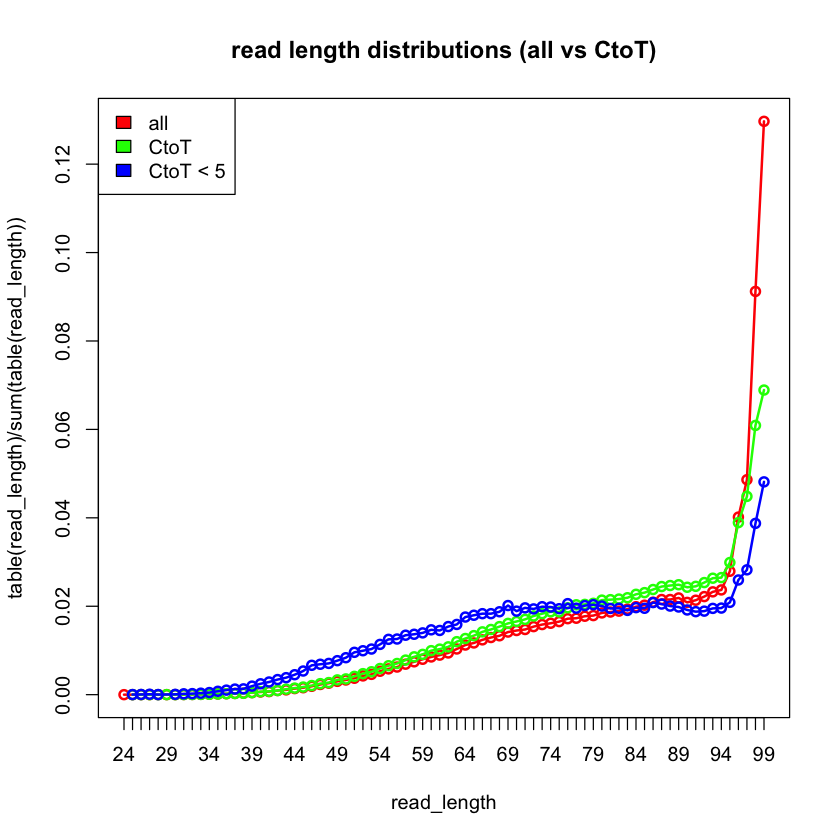

In [18]:
plot(table(read_length)/sum(table(read_length)), type="o", col="red", 
     main="read length distributions (all vs CtoT)")
points(table(read_length_CtoT)/sum(table(read_length_CtoT)), type="o", col="green")
points(table(read_length_3)/ sum(table(read_length_3)), type="o", col="blue")
legend("topleft", fill=c("red", "green", "blue"), legend = c("all", "CtoT", "CtoT < 5"))

The above plot seems to raise a question. Are C to T at the ends more frequently occurring in reads that have shorter size? or smaller fragments? The relationship is not too strong, but definitely worth investigating. So, we looked into all the 25 ancient samples that John Lindo had. 

In [ ]:
files <- list.files("../data/Lindo2016ancients/")
dir <- "../data/Lindo2016ancients/"
tab <- list()
for(l in files){
    tab[[l]] <- read.csv(paste0(dir, l), header=FALSE)
    cat("We are at sample", l, "\n")
}

In [40]:
ancient_names <- as.character(sapply(files, function(x) return(strsplit(x, "[_]")[[1]][1])))

we are at sample 1 
we are at sample 2 
we are at sample 3 
we are at sample 4 
we are at sample 5 
we are at sample 6 
we are at sample 7 
we are at sample 8 
we are at sample 9 
we are at sample 10 
we are at sample 11 
we are at sample 12 
we are at sample 13 
we are at sample 14 
we are at sample 15 
we are at sample 16 
we are at sample 17 


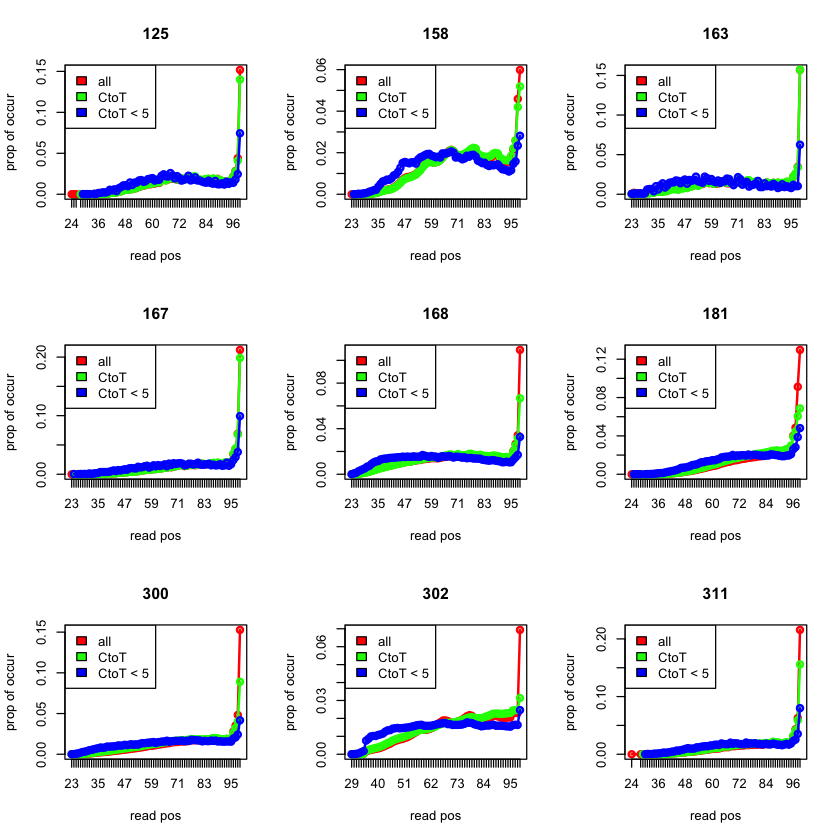

we are at sample 18 
we are at sample 19 
we are at sample 20 
we are at sample 21 
we are at sample 22 
we are at sample 23 
we are at sample 24 
we are at sample 25 


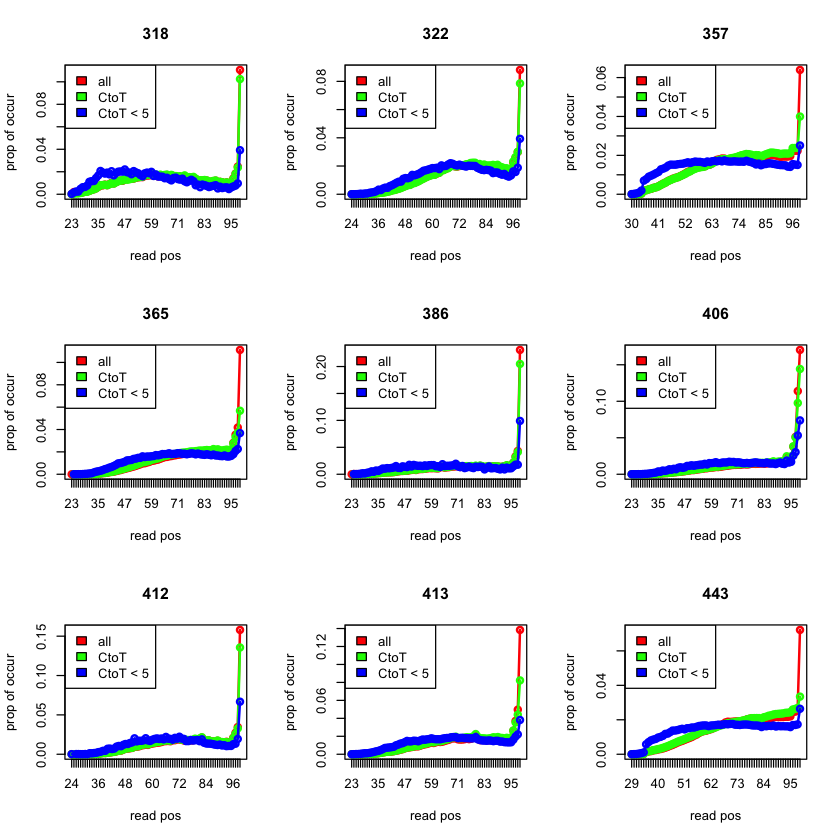

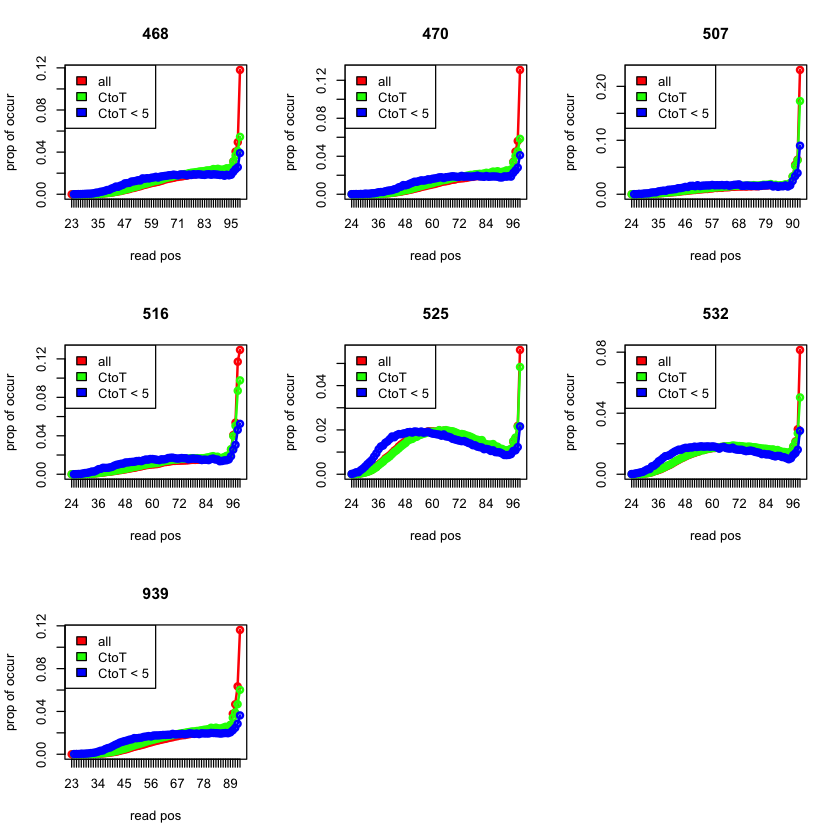

In [42]:
par(mfrow=c(3,3))
for(l in 1:length(tab)){
    tab1 <- tab[[l]]
    read_length <- tab1$V2 + tab1$V3
    indices <- grep("C->T", tab1$V1)
    indices <- c(indices, grep("G->A", tab1$V1))
    read_length_CtoT <- tab1[indices, ]$V2 + tab1[indices, ]$V3 ## read lengths for all C to T
    indices2 <- which(tab1$V2 < 5 | tab1$V3 < 5)
    indices_matched <- intersect(indices, indices2)
    read_length_3 <- (tab1[indices_matched, ]$V2 + tab1[indices_matched, ]$V3)
    plot(table(read_length)/sum(table(read_length)), type="o", col="red", 
     main=paste0(ancient_names[l]), xlab="read pos", ylab="prop of occur")
    points(table(read_length_CtoT)/sum(table(read_length_CtoT)), type="o", col="green")
    points(table(read_length_3)/ sum(table(read_length_3)), type="o", col="blue")
    legend("topleft", fill=c("red", "green", "blue"), legend = c("all", "CtoT", "CtoT < 5"))
    cat("we are at sample", l, "\n")
}

We now see how the same patterns look like when we consider the 25 moderns from the data due to John Lindo.

In [45]:
files <- list.files("../data/Lindo2016moderns/")
dir <- "../data/Lindo2016moderns/"
tab <- list()
for(l in files){
    tab[[l]] <- read.csv(paste0(dir, l), header=FALSE)
    cat("We are at sample", l, "\n")
}

We are at sample S001_all_chr.q30.csv 
We are at sample S002_all_chr.q30.csv 
We are at sample T004_all_chr.q30.csv 
We are at sample T008_all_chr.q30.csv 
We are at sample t012_all_chr.q30.csv 
We are at sample T015_all_chr.q30.csv 
We are at sample t018_all_chr.q30.csv 
We are at sample t023_all_chr.q30.csv 
We are at sample t024_all_chr.q30.csv 
We are at sample t026_all_chr.q30.csv 
We are at sample t028_all_chr.q30.csv 
We are at sample t036_all_chr.q30.csv 
We are at sample t052_all_chr.q30.csv 
We are at sample t054_all_chr.q30.csv 
We are at sample t055_all_chr.q30.csv 
We are at sample t057_all_chr.q30.csv 
We are at sample t058_all_chr.q30.csv 
We are at sample t059_all_chr.q30.csv 
We are at sample t060_all_chr.q30.csv 
We are at sample t061_all_chr.q30.csv 
We are at sample t066_all_chr.q30.csv 
We are at sample t067_all_chr.q30.csv 
We are at sample t200_all_chr.q30.csv 
We are at sample t201_all_chr.q30.csv 
We are at sample t202_all_chr.q30.csv 


In [46]:
modern_names <- as.character(sapply(files, function(x) return(strsplit(x, "[_]")[[1]][1])))

we are at sample 1 
we are at sample 2 
we are at sample 3 
we are at sample 4 
we are at sample 5 
we are at sample 6 
we are at sample 7 
we are at sample 8 
we are at sample 9 
we are at sample 10 
we are at sample 11 
we are at sample 12 
we are at sample 13 
we are at sample 14 
we are at sample 15 
we are at sample 16 
we are at sample 17 


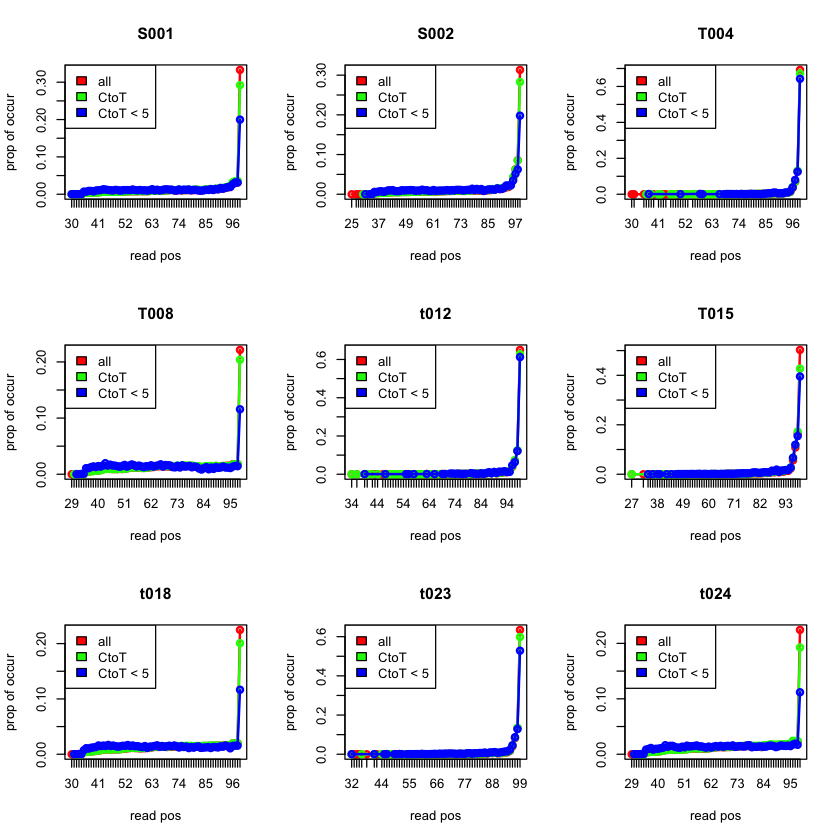

we are at sample 18 
we are at sample 19 
we are at sample 20 
we are at sample 21 
we are at sample 22 
we are at sample 23 
we are at sample 24 
we are at sample 25 


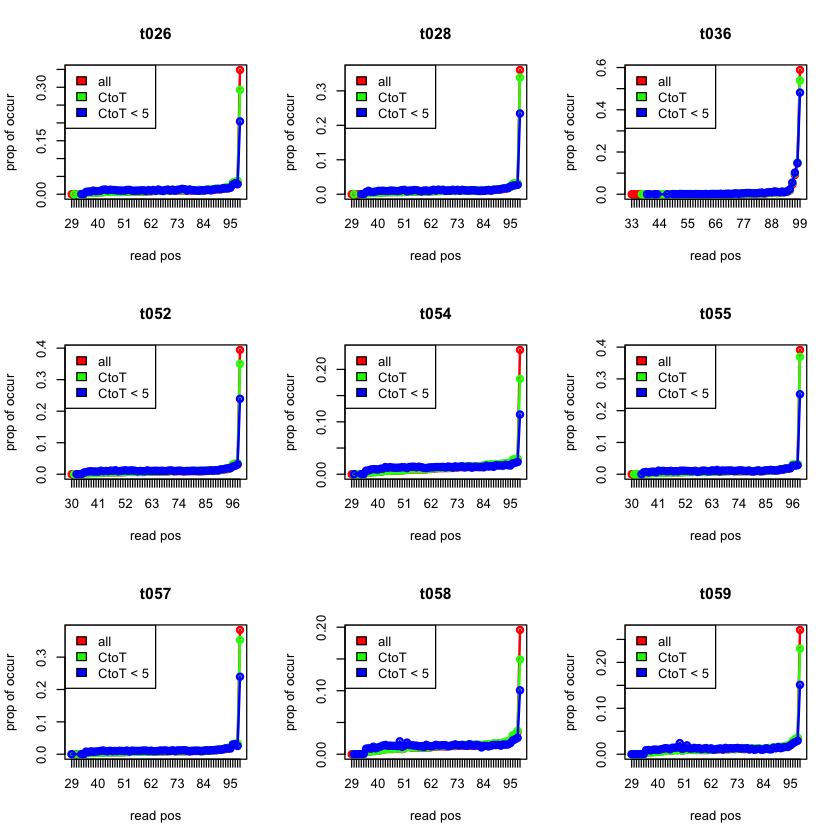

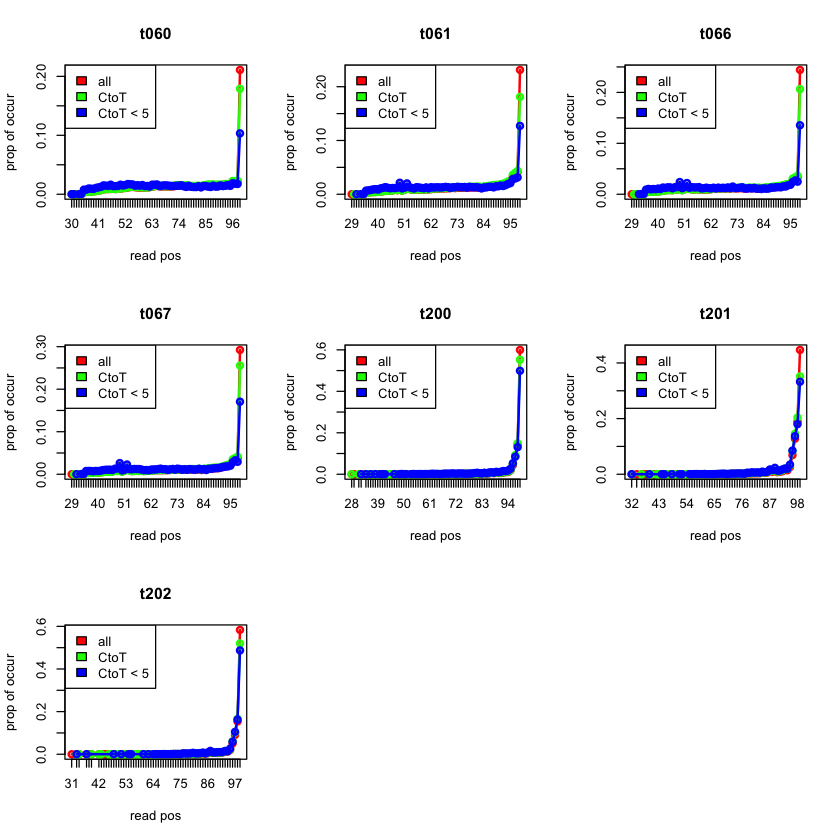

In [47]:
par(mfrow=c(3,3))
for(l in 1:length(tab)){
    tab1 <- tab[[l]]
    read_length <- tab1$V2 + tab1$V3
    indices <- grep("C->T", tab1$V1)
    indices <- c(indices, grep("G->A", tab1$V1))
    read_length_CtoT <- tab1[indices, ]$V2 + tab1[indices, ]$V3 ## read lengths for all C to T
    indices2 <- which(tab1$V2 < 5 | tab1$V3 < 5)
    indices_matched <- intersect(indices, indices2)
    read_length_3 <- (tab1[indices_matched, ]$V2 + tab1[indices_matched, ]$V3)
    plot(table(read_length)/sum(table(read_length)), type="o", col="red", 
     main=paste0(modern_names[l]), xlab="read pos", ylab="prop of occur")
    points(table(read_length_CtoT)/sum(table(read_length_CtoT)), type="o", col="green")
    points(table(read_length_3)/ sum(table(read_length_3)), type="o", col="blue")
    legend("topleft", fill=c("red", "green", "blue"), legend = c("all", "CtoT", "CtoT < 5"))
    cat("we are at sample", l, "\n")
}

Okay, so it seems that ancient samples indeed show slightly higher C to T changes at the ends of the reads for smaller fragments, which is not seen in modern samples. But is this finding exclusive to John Lindo data or can we find similar patterns in other datasets as well. 
    
In order to make a more generic conclusion, we look at the Sherpa and the Sardinia data on the ancient front, and the 
HGDP moderns data on the modern front.

### Fragments vs C to T (Sardinia)

In [50]:
files <- list.files("../data/Sardinia2017/")
dir <- "../data/Sardinia2017/"
tab <- list()
for(l in files){
    tab[[l]] <- read.csv(paste0(dir, l), header=FALSE)
    cat("We are at sample", l, "\n")
}

We are at sample ISB001.A0201_S0_L008_R1_001.fastq.fq.qF.sorted.cleaned_rmdup.q30.csv 
We are at sample LON001.A0201_S0_L008_R1_001.fastq.fq.qF.sorted.cleaned_rmdup.q30.csv 
We are at sample SUA001.A0201_S0_L008_R1_001.fastq.fq.qF.sorted.cleaned_rmdup.q30.csv 
We are at sample SUA002.A0201_S0_L008_R1_001.fastq.fq.qF.sorted.cleaned_rmdup.q30.csv 
We are at sample SUA003.A0201_S0_L008_R1_001.fastq.fq.qF.sorted.cleaned_rmdup.q30.csv 


we are at sample 1 
we are at sample 2 
we are at sample 3 
we are at sample 4 
we are at sample 5 


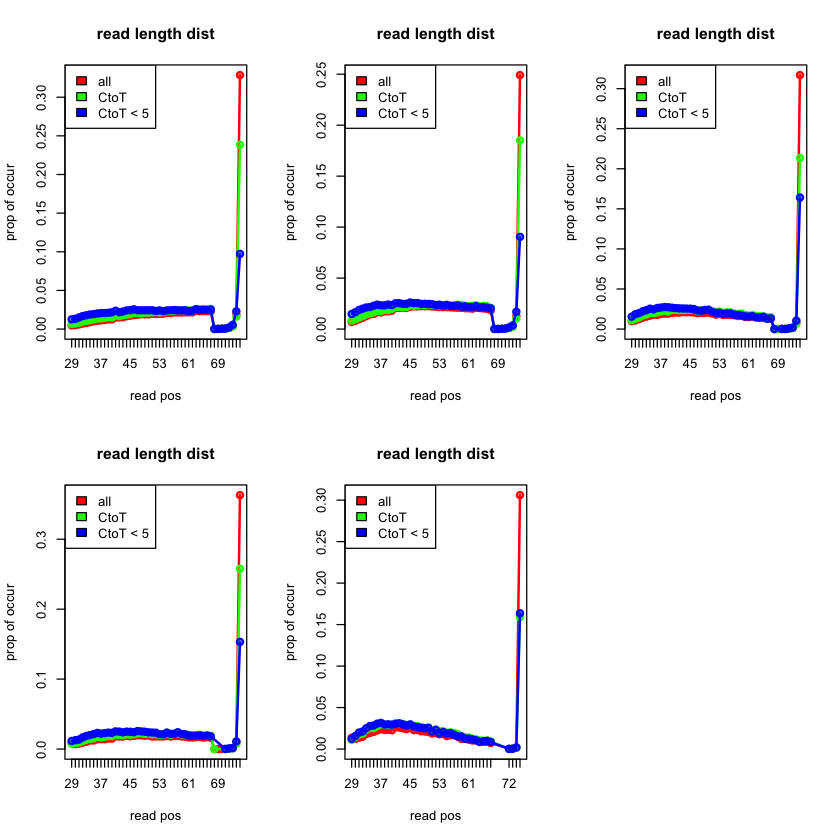

In [52]:
par(mfrow=c(2,3))
for(l in 1:length(tab)){
    tab1 <- tab[[l]]
    read_length <- tab1$V2 + tab1$V3
    indices <- grep("C->T", tab1$V1)
    indices <- c(indices, grep("G->A", tab1$V1))
    read_length_CtoT <- tab1[indices, ]$V2 + tab1[indices, ]$V3 ## read lengths for all C to T
    indices2 <- which(tab1$V2 < 5 | tab1$V3 < 5)
    indices_matched <- intersect(indices, indices2)
    read_length_3 <- (tab1[indices_matched, ]$V2 + tab1[indices_matched, ]$V3)
    plot(table(read_length)/sum(table(read_length)), type="o", col="red", 
     main="read length dist", xlab="read pos", ylab="prop of occur")
    points(table(read_length_CtoT)/sum(table(read_length_CtoT)), type="o", col="green")
    points(table(read_length_3)/ sum(table(read_length_3)), type="o", col="blue")
    legend("topleft", fill=c("red", "green", "blue"), legend = c("all", "CtoT", "CtoT < 5"))
    cat("we are at sample", l, "\n")
}

## Gosling Ancient + controls data

We now analyse the 47 ancients and 7 control samples from Gosling's data

In [53]:
files <- list.files("../data/AnnaGosling2016data/")
dir <- "../data/AnnaGosling2016data/"
tab <- list()
for(l in files){
    tab[[l]] <- read.csv(paste0(dir, l), header=FALSE)
    cat("We are at sample", l, "\n")
}

We are at sample ADR-T1-CNE1.dup.q30.csv 
We are at sample ADR-T1-KS20.dup.q30.csv 
We are at sample ADR-T1-KS21.dup.q30.csv 
We are at sample ADR-T1-KS26.dup.q30.csv 
We are at sample ADR-T1-KS4.dup.q30.csv 
We are at sample ADR-T1-M241.dup.q30.csv 
We are at sample ADR-T1-M295.dup.q30.csv 
We are at sample ADR-T1-M4681.dup.q30.csv 
We are at sample ADR-T1-R1.dup.q30.csv 
We are at sample ADR-T1-R2.dup.q30.csv 
We are at sample ADR-T1-R5.dup.q30.csv 
We are at sample ADR-T1-R8.dup.q30.csv 
We are at sample ADR-T1-S13.dup.q30.csv 
We are at sample ADR-T1-S163.dup.q30.csv 
We are at sample ADR-T1-S173.dup.q30.csv 
We are at sample ADR-T1-S18.dup.q30.csv 
We are at sample ADR-T1-S183.dup.q30.csv 
We are at sample ADR-T1-S19.dup.q30.csv 
We are at sample ADR-T1-S20.dup.q30.csv 
We are at sample ADR-T1-S21.dup.q30.csv 
We are at sample ADR-T1-S22.dup.q30.csv 
We are at sample ADR-T1-S29.dup.q30.csv 
We are at sample ADR-T1-S30.dup.q30.csv 
We are at sample ADR-T1-S32.dup.q30.csv 
We are at

In [66]:
names <- as.character(sapply(files, function(x) return(strsplit(x, c("[-]"))[[1]][3])))

In [67]:
names

[1] "CNE1.dup.q30.csv"    "KS20.dup.q30.csv"    "KS21.dup.q30.csv"   
 [4] "KS26.dup.q30.csv"    "KS4.dup.q30.csv"     "M241.dup.q30.csv"   
 [7] "M295.dup.q30.csv"    "M4681.dup.q30.csv"   "R1.dup.q30.csv"     
[10] "R2.dup.q30.csv"      "R5.dup.q30.csv"      "R8.dup.q30.csv"     
[13] "S13.dup.q30.csv"     "S163.dup.q30.csv"    "S173.dup.q30.csv"   
[16] "S18.dup.q30.csv"     "S183.dup.q30.csv"    "S19.dup.q30.csv"    
[19] "S20.dup.q30.csv"     "S21.dup.q30.csv"     "S22.dup.q30.csv"    
[22] "S29.dup.q30.csv"     "S30.dup.q30.csv"     "S32.dup.q30.csv"    
[25] "S33.dup.q30.csv"     "S34.dup.q30.csv"     "S8.dup.q30.csv"     
[28] "C2.dup.q30.csv"      "C3.dup.q30.csv"      "EXN1.dup.q30.csv"   
[31] "EXN2.dup.q30.csv"    "EXN3.dup.q30.csv"    "KM4.dup.q30.csv"    
[34] "KS23.dup.q30.csv"    "KS25.dup.q30.csv"    "KS5.dup.q30.csv"    
[37] "KS8.dup.q30.csv"     "KS9.dup.q30.csv"     "Libneg1.dup.q30.csv"
[40] "Libneg2.dup.q30.csv" "Libneg3.dup.q30.csv" "M2113.dup.q30.csv"  
[43] "M339.dup.q30.csv"    "M3490.dup.q30.csv"   "M354.dup.q30.csv"   
[46] "M359.dup.q30.csv"    "M368.dup.q30.csv"    "M4580.dup.q30.csv"  
[49] "PCRneg.dup.q30.csv"  "R7.dup.q30.csv"      "S143.dup.q30.csv"   
[52] "S153.dup.q30.csv"    "S16.dup.q30.csv"     "S28.dup.q30.csv"    
[55] "S36.dup.q30.csv"

we are at sample 1 
we are at sample 2 
we are at sample 3 
we are at sample 4 
we are at sample 5 
we are at sample 6 
we are at sample 7 
we are at sample 8 
we are at sample 9 
we are at sample 10 
we are at sample 11 
we are at sample 12 
we are at sample 13 
we are at sample 14 
we are at sample 15 
we are at sample 16 
we are at sample 17 


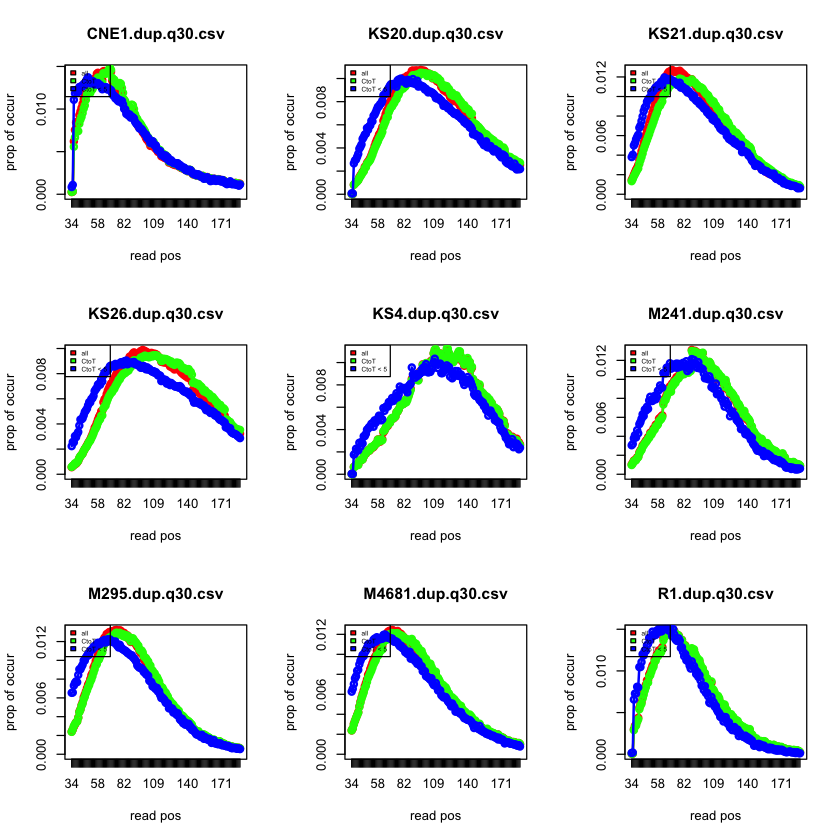

we are at sample 18 
we are at sample 19 
we are at sample 20 
we are at sample 21 
we are at sample 22 
we are at sample 23 
we are at sample 24 
we are at sample 25 
we are at sample 26 


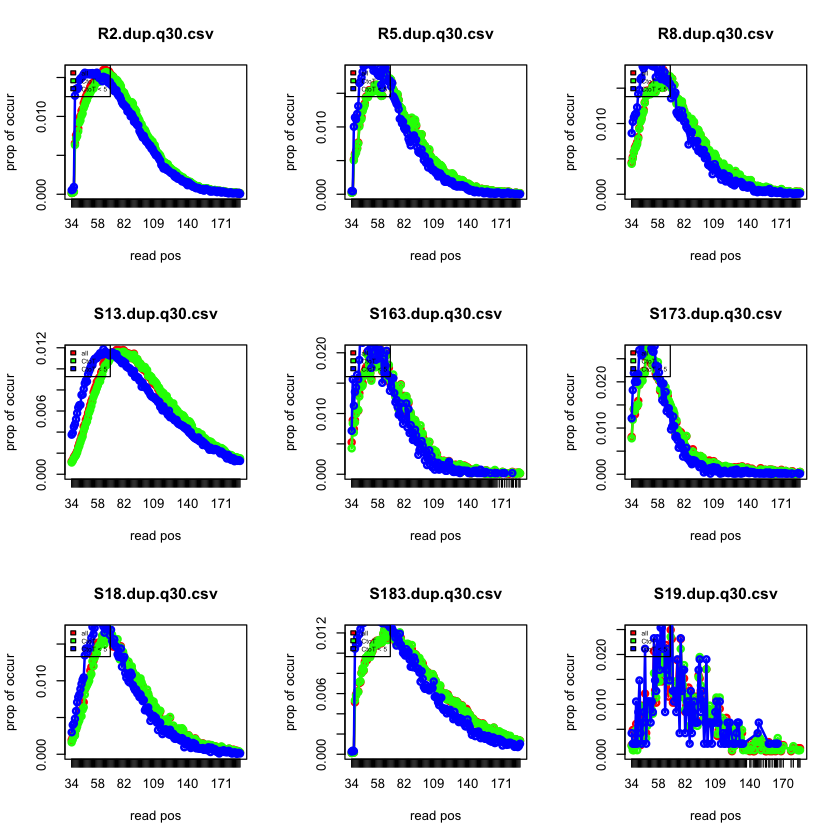

we are at sample 27 
we are at sample 28 
we are at sample 29 
we are at sample 30 
we are at sample 31 
we are at sample 32 
we are at sample 33 
we are at sample 34 
we are at sample 35 


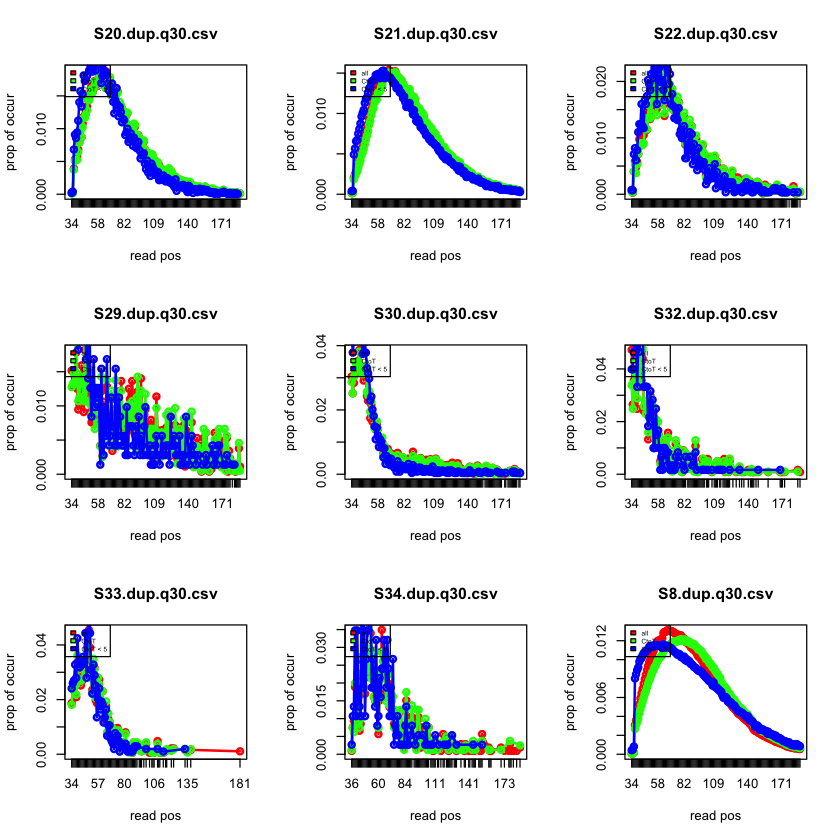

we are at sample 36 
we are at sample 37 
we are at sample 38 
we are at sample 39 
we are at sample 40 
we are at sample 41 
we are at sample 42 
we are at sample 43 
we are at sample 44 


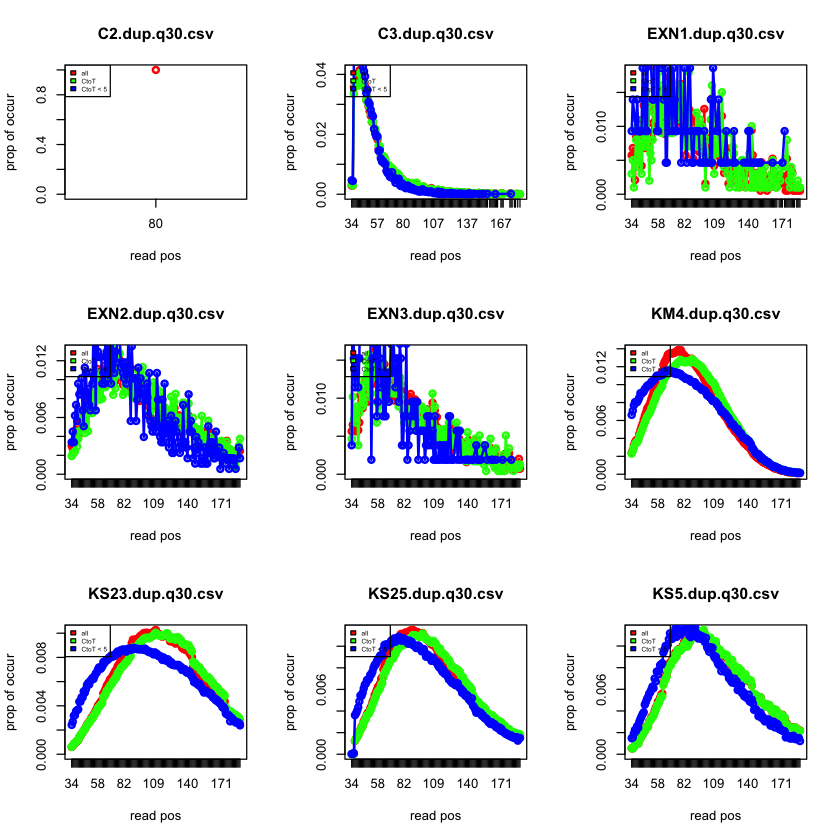

we are at sample 45 
we are at sample 46 
we are at sample 47 
we are at sample 48 
we are at sample 49 
we are at sample 50 
we are at sample 51 
we are at sample 52 
we are at sample 53 


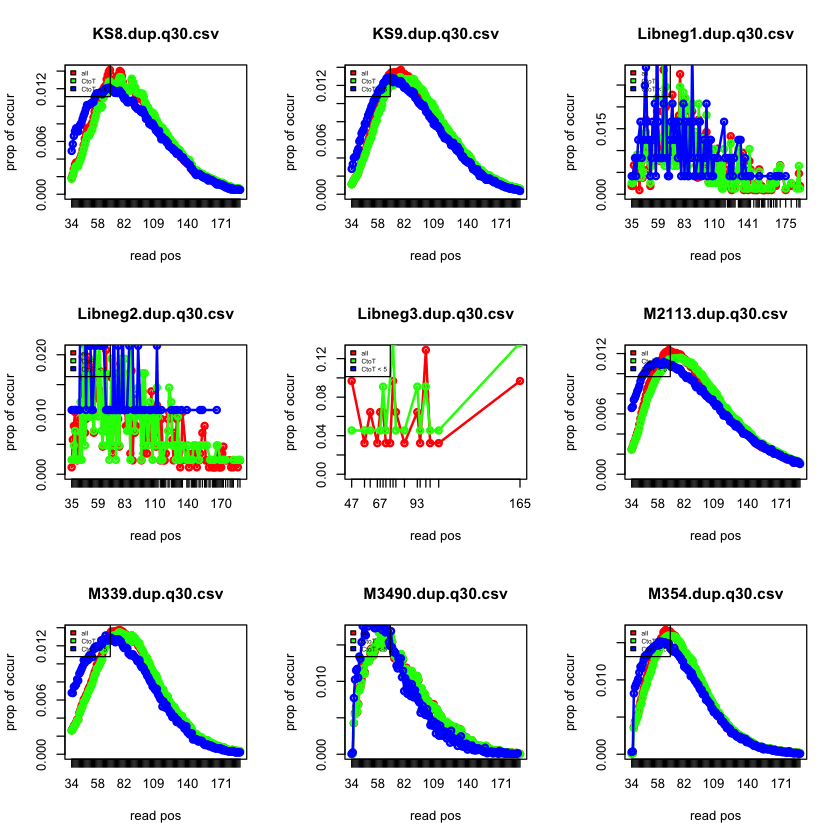

we are at sample 54 
we are at sample 55 


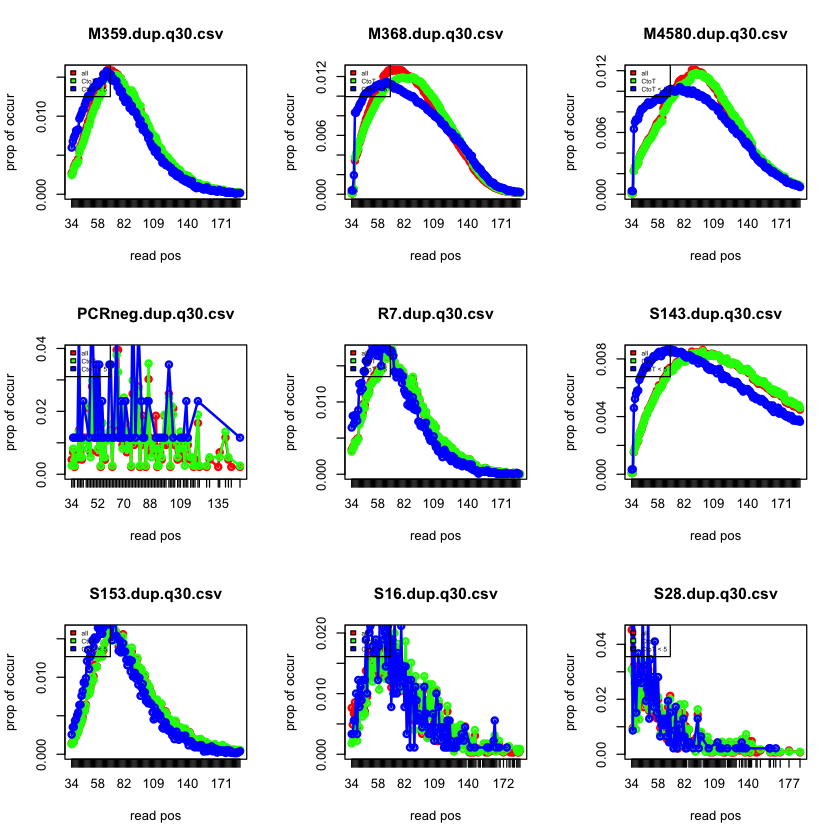

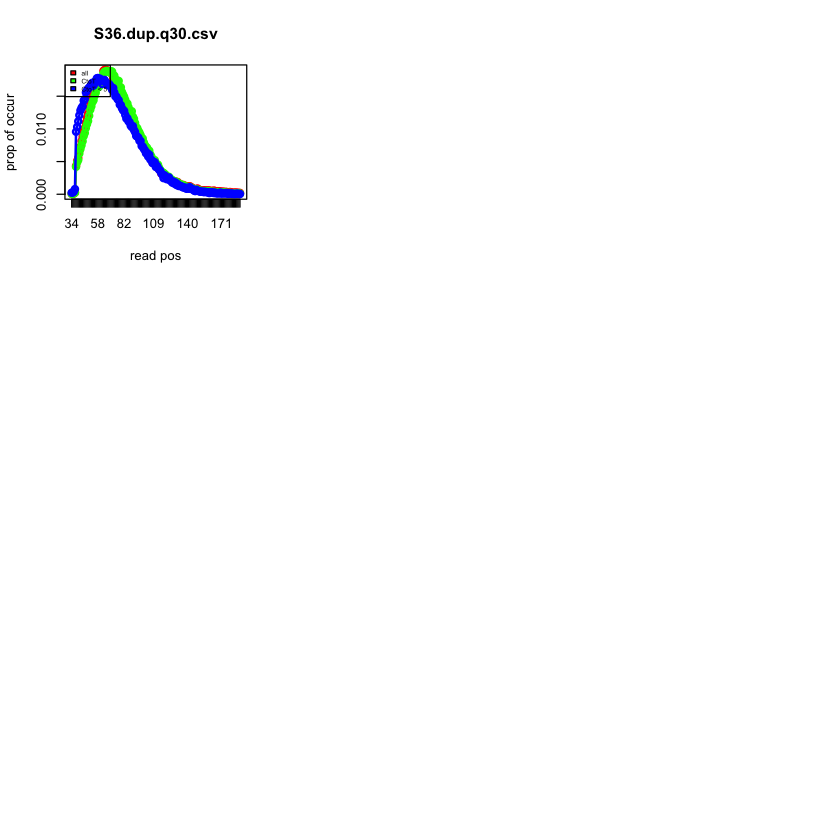

In [69]:
par(mfrow=c(3,3))
for(l in 1:length(tab)){
    tab1 <- tab[[l]]
    read_length <- tab1$V2 + tab1$V3
    indices <- grep("C->T", tab1$V1)
    indices <- c(indices, grep("G->A", tab1$V1))
    read_length_CtoT <- tab1[indices, ]$V2 + tab1[indices, ]$V3 ## read lengths for all C to T
    indices2 <- which(tab1$V2 < 5 | tab1$V3 < 5)
    indices_matched <- intersect(indices, indices2)
    read_length_3 <- (tab1[indices_matched, ]$V2 + tab1[indices_matched, ]$V3)
    plot(table(read_length)/sum(table(read_length)), type="o", col="red", 
     main=paste0(names[l]), xlab="read pos", ylab="prop of occur")
    points(table(read_length_CtoT)/sum(table(read_length_CtoT)), type="o", col="green")
    points(table(read_length_3)/ sum(table(read_length_3)), type="o", col="blue")
    legend("topleft", fill=c("red", "green", "blue"), legend = c("all", "CtoT", "CtoT < 5"), cex=0.5)
    cat("we are at sample", l, "\n")
}

## Other moderns (fragmentation vs C to T)

We take the HGDP modern samples and investigate the fragmentation versus C to T patterns.

In [70]:
files <- list.files("../data/HGDPmoderns/")
dir <- "../data/HGDPmoderns/"
tab <- list()
for(l in files){
    tab[[l]] <- read.csv(paste0(dir, l), header=FALSE)
    cat("We are at sample", l, "\n")
}

We are at sample HGDP00521.q30.csv 
We are at sample HGDP00542.q30.csv 
We are at sample HGDP00665.q30.csv 
We are at sample HGDP00778.q30.csv 
We are at sample HGDP00927.q30.csv 
We are at sample HGDP00998.q30.csv 
We are at sample HGDP01029.q30.csv 
We are at sample HGDP01284.q30.csv 
We are at sample HGDP01307.q30.csv 
We are at sample HGDP0456.q30.csv 


we are at sample 1 
we are at sample 2 
we are at sample 3 
we are at sample 4 
we are at sample 5 
we are at sample 6 
we are at sample 7 
we are at sample 8 
we are at sample 9 
we are at sample 10 


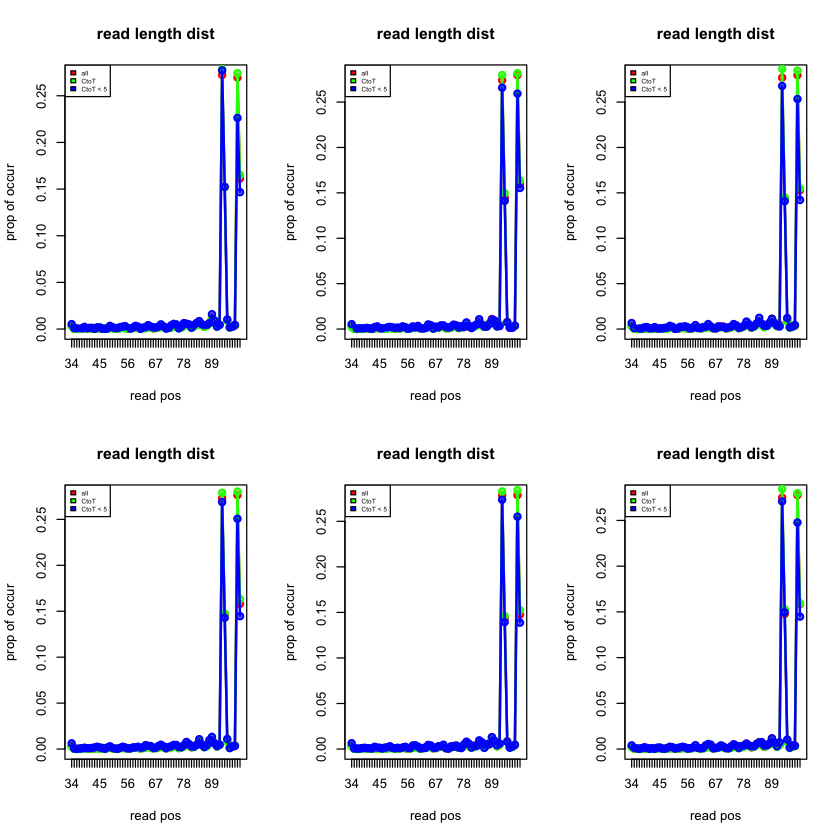

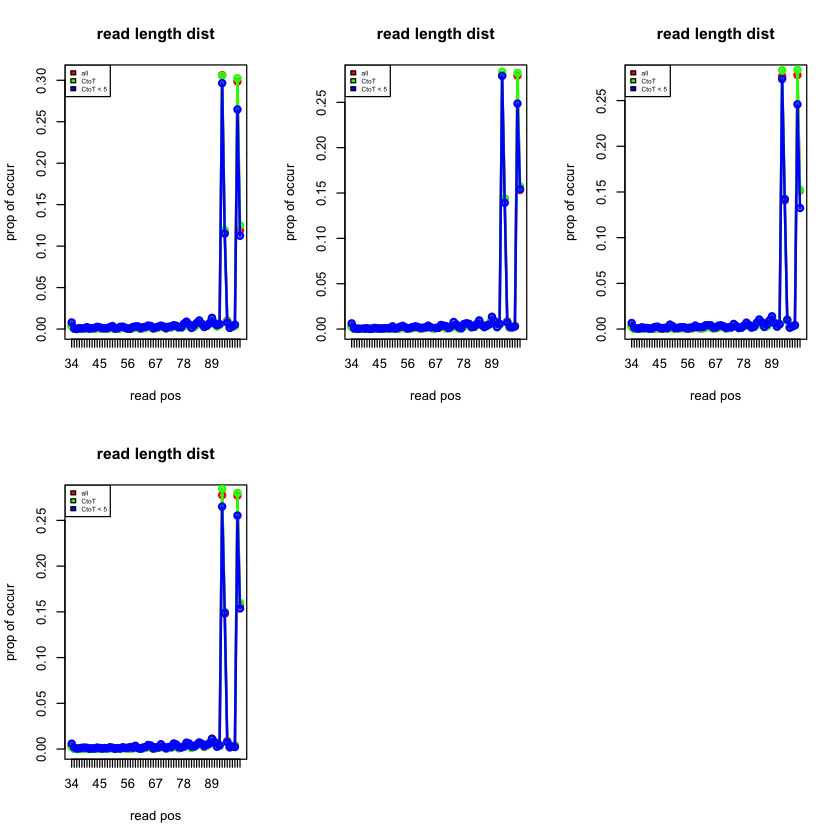

In [72]:
par(mfrow=c(2,3))
for(l in 1:length(tab)){
    tab1 <- tab[[l]]
    read_length <- tab1$V2 + tab1$V3
    indices <- grep("C->T", tab1$V1)
    indices <- c(indices, grep("G->A", tab1$V1))
    read_length_CtoT <- tab1[indices, ]$V2 + tab1[indices, ]$V3 ## read lengths for all C to T
    indices2 <- which(tab1$V2 < 5 | tab1$V3 < 5)
    indices_matched <- intersect(indices, indices2)
    read_length_3 <- (tab1[indices_matched, ]$V2 + tab1[indices_matched, ]$V3)
    plot(table(read_length)/sum(table(read_length)), type="o", col="red", 
     main="read length dist", xlab="read pos", ylab="prop of occur")
    points(table(read_length_CtoT)/sum(table(read_length_CtoT)), type="o", col="green")
    points(table(read_length_3)/ sum(table(read_length_3)), type="o", col="blue")
    legend("topleft", fill=c("red", "green", "blue"), legend = c("all", "CtoT", "CtoT < 5"), cex=0.5)
    cat("we are at sample", l, "\n")
}

### 1000 genomes (Fragmentation vs C to T)

In [74]:
files <- sample(list.files("../data/1000Gmoderns/"))[1:50]
dir <- "../data/1000Gmoderns/"
tab <- list()
for(l in files){
    tab[[l]] <- read.csv(paste0(dir, l), header=FALSE)
    cat("We are at sample", l, "\n")
}

We are at sample HG00126.mapped.ILLUMINA.bwa.GBR.low_coverage.20121211.q30.csv 
We are at sample HG01259.mapped.ILLUMINA.bwa.CLM.low_coverage.20130415.q30.csv 
We are at sample HG01140.mapped.ILLUMINA.bwa.CLM.low_coverage.20120522.q30.csv 
We are at sample HG01075.mapped.ILLUMINA.bwa.PUR.low_coverage.20120522.q30.csv 
We are at sample HG00739.mapped.ILLUMINA.bwa.PUR.low_coverage.20120522.q30.csv 
We are at sample HG01105.mapped.ILLUMINA.bwa.PUR.low_coverage.20130415.q30.csv 
We are at sample HG00120.mapped.ILLUMINA.bwa.GBR.low_coverage.20120522.q30.csv 
We are at sample HG01351.mapped.ILLUMINA.bwa.CLM.low_coverage.20120522.q30.csv 
We are at sample NA19728.mapped.ILLUMINA.bwa.MXL.low_coverage.20120522.q30.csv 
We are at sample HG00640.mapped.ILLUMINA.bwa.PUR.low_coverage.20120522.q30.csv 
We are at sample HG00452.mapped.ILLUMINA.bwa.CHS.low_coverage.20130415.q30.csv 
We are at sample HG01080.mapped.ILLUMINA.bwa.PUR.low_coverage.20120522.q30.csv 
We are at sample HG00173.mapped.ILLUMINA

In [75]:
modern_names <- as.character(sapply(files, function(x) return(strsplit(x, c("[.]"))[[1]][5])))

we are at sample 1 
we are at sample 2 
we are at sample 3 
we are at sample 4 
we are at sample 5 
we are at sample 6 
we are at sample 7 
we are at sample 8 
we are at sample 9 
we are at sample 10 
we are at sample 11 


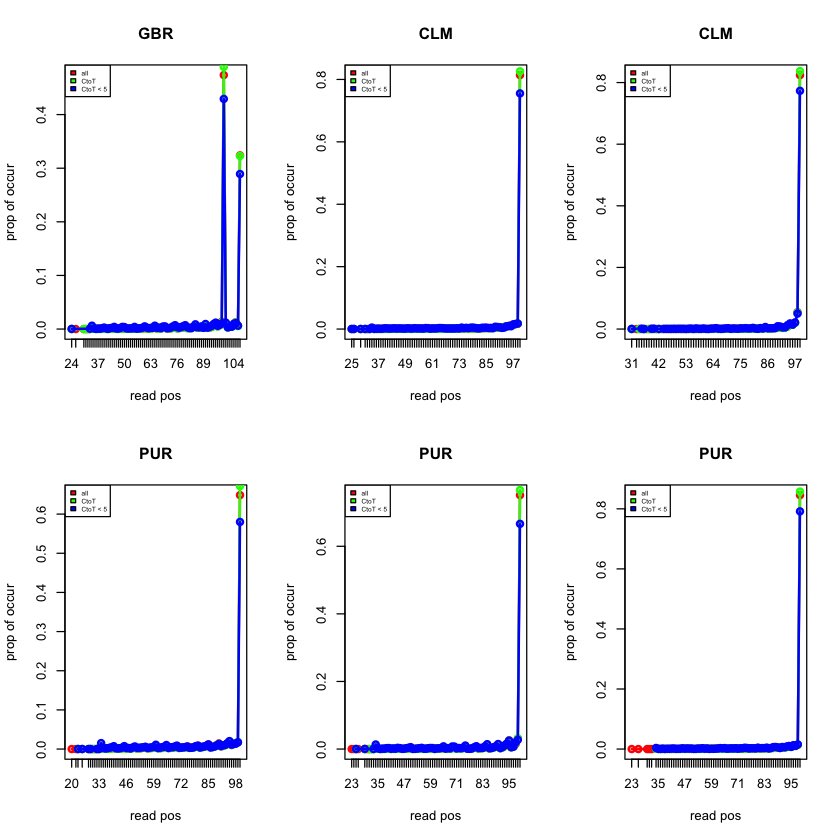

we are at sample 12 
we are at sample 13 
we are at sample 14 
we are at sample 15 
we are at sample 16 
we are at sample 17 


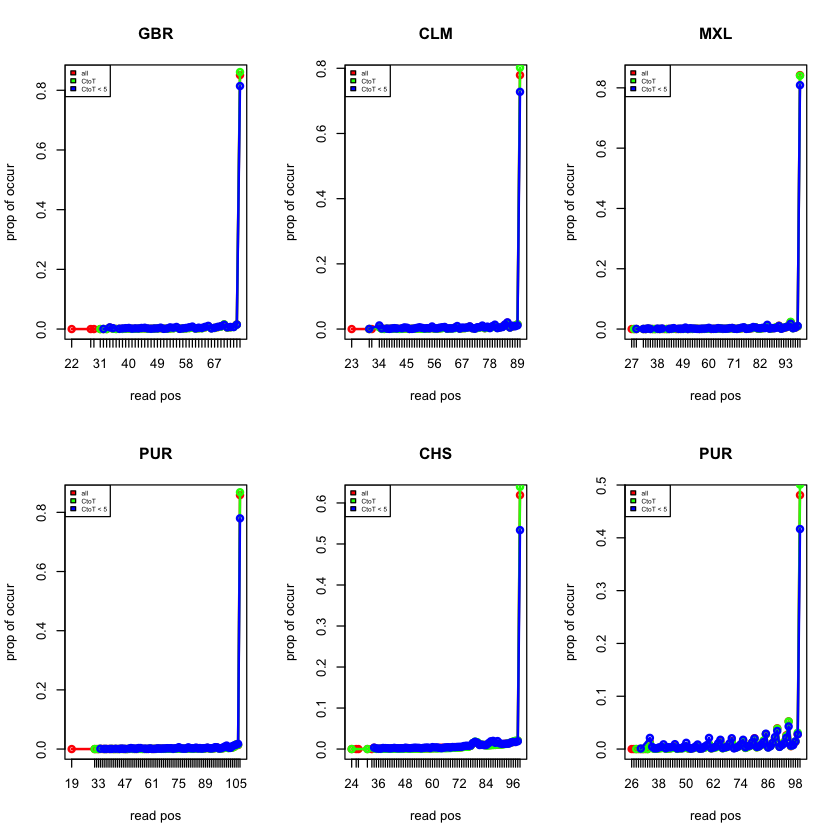

we are at sample 18 
we are at sample 19 
we are at sample 20 
we are at sample 21 
we are at sample 22 
we are at sample 23 


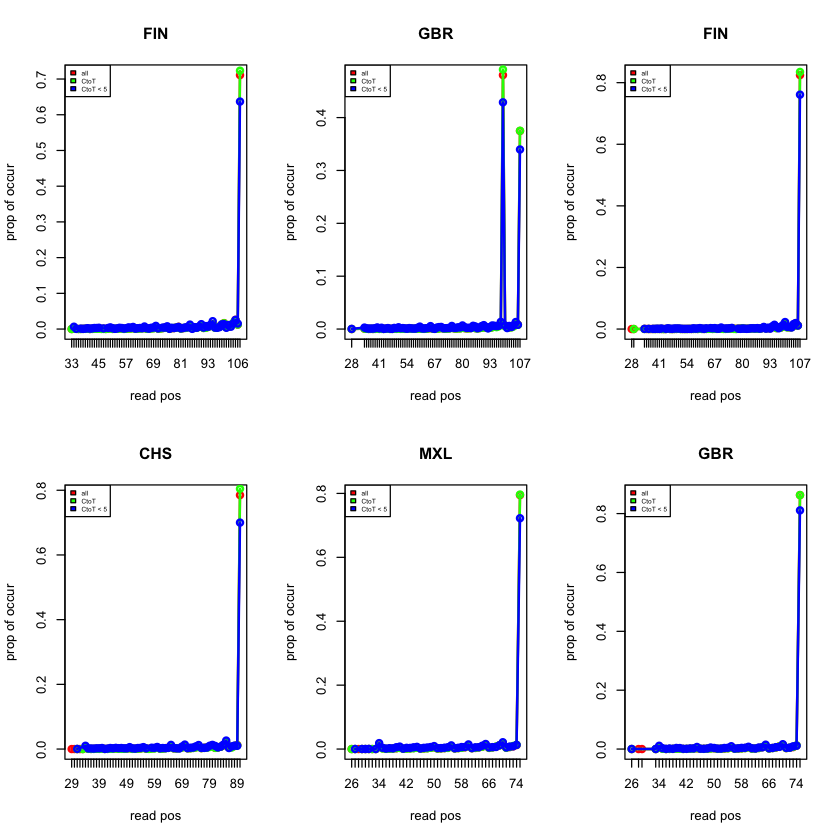

we are at sample 24 
we are at sample 25 
we are at sample 26 
we are at sample 27 
we are at sample 28 
we are at sample 29 


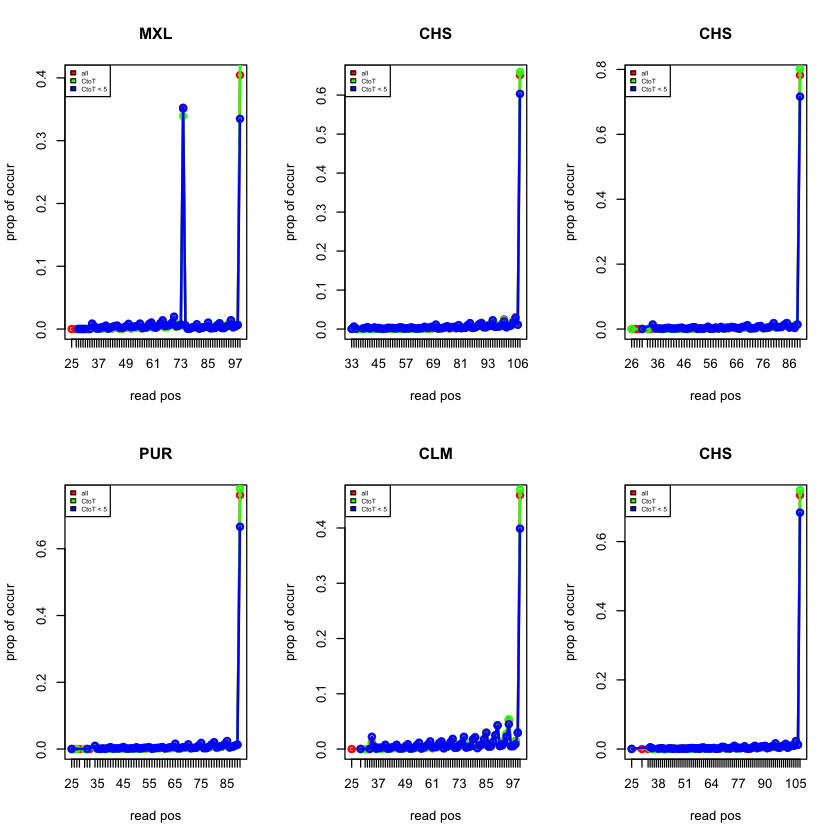

we are at sample 30 
we are at sample 31 
we are at sample 32 
we are at sample 33 
we are at sample 34 
we are at sample 35 


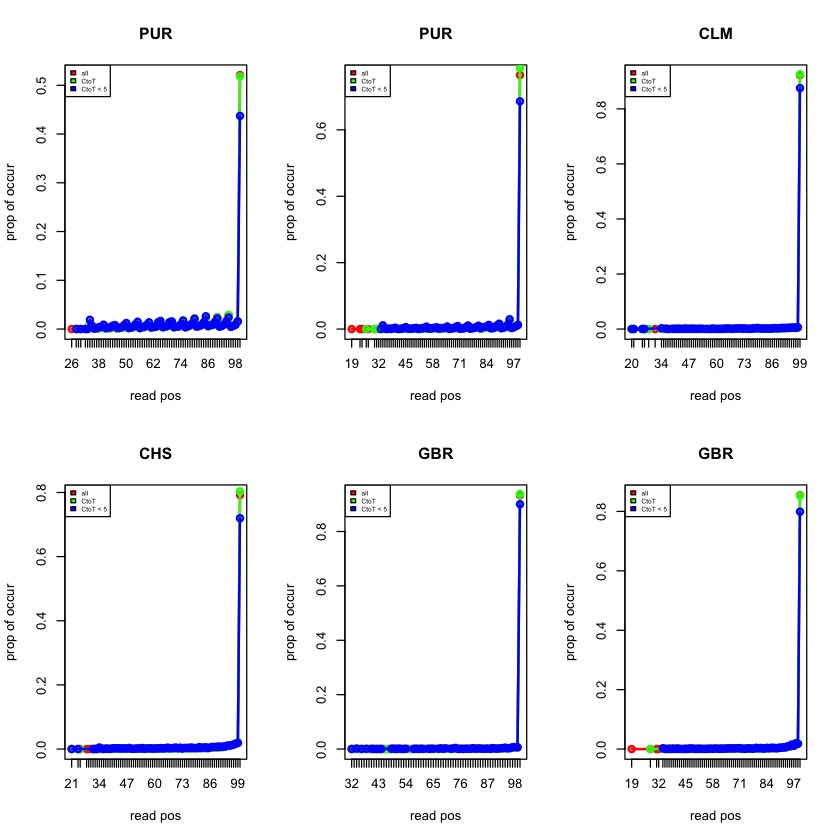

we are at sample 36 
we are at sample 37 
we are at sample 38 
we are at sample 39 
we are at sample 40 
we are at sample 41 


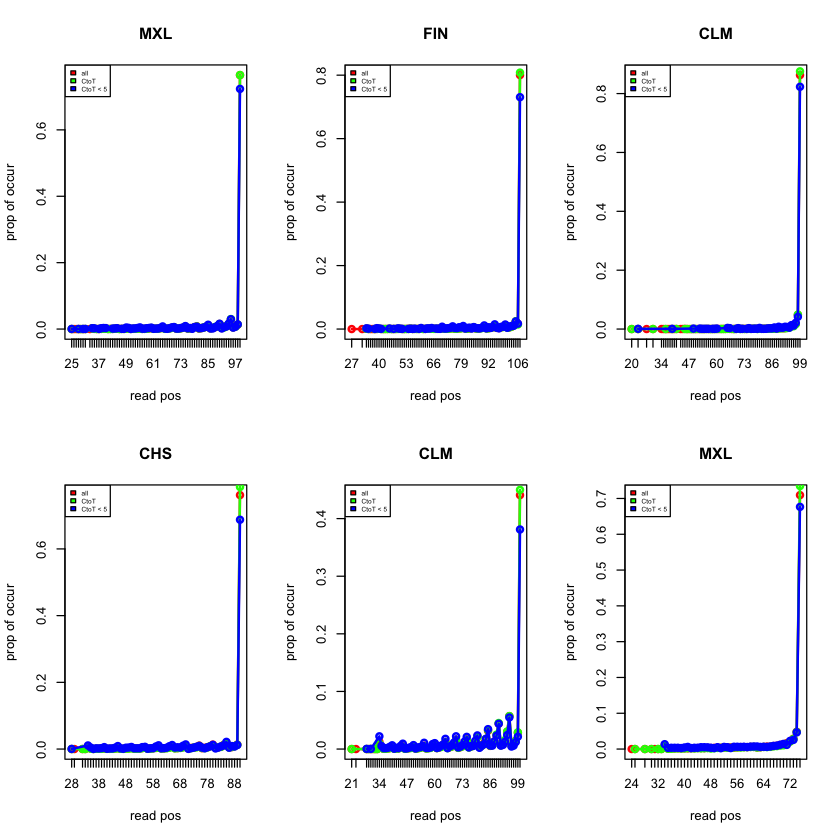

we are at sample 42 
we are at sample 43 
we are at sample 44 
we are at sample 45 
we are at sample 46 
we are at sample 47 


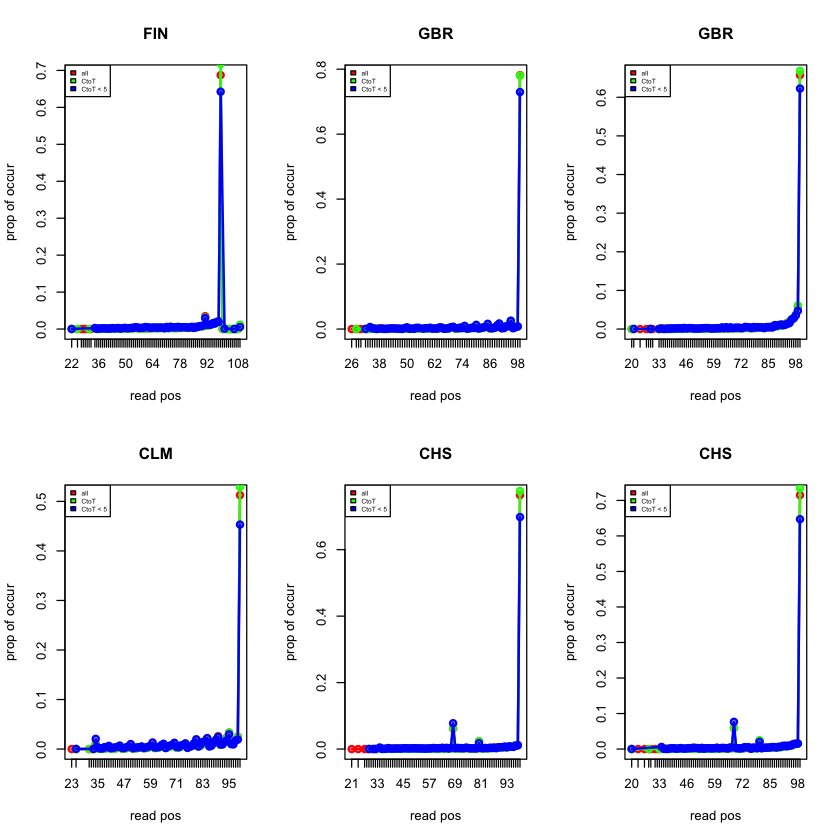

we are at sample 48 
we are at sample 49 
we are at sample 50 


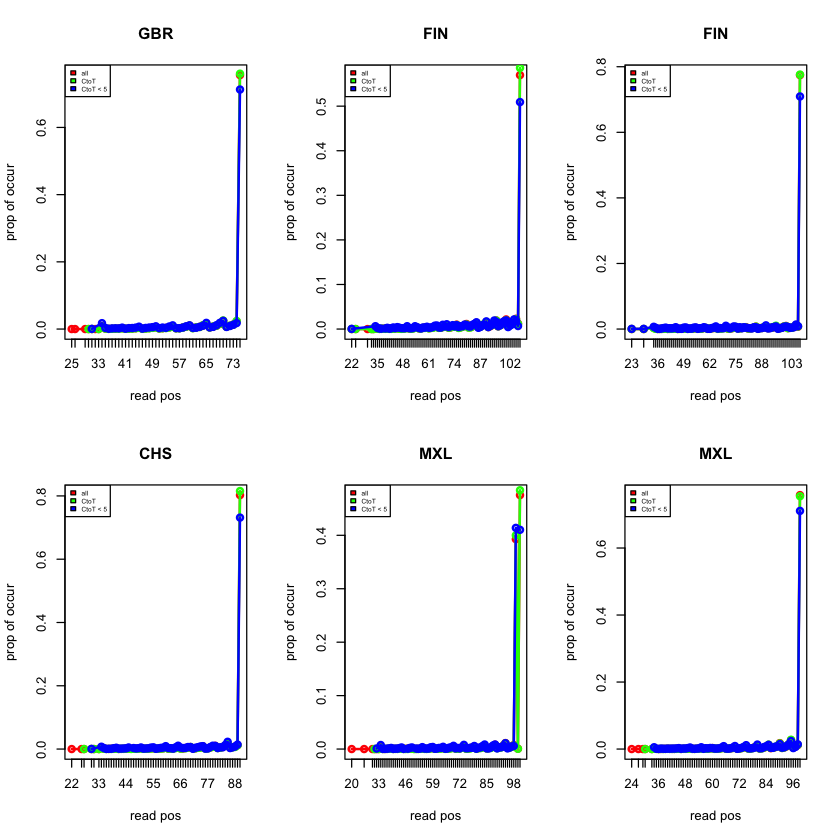

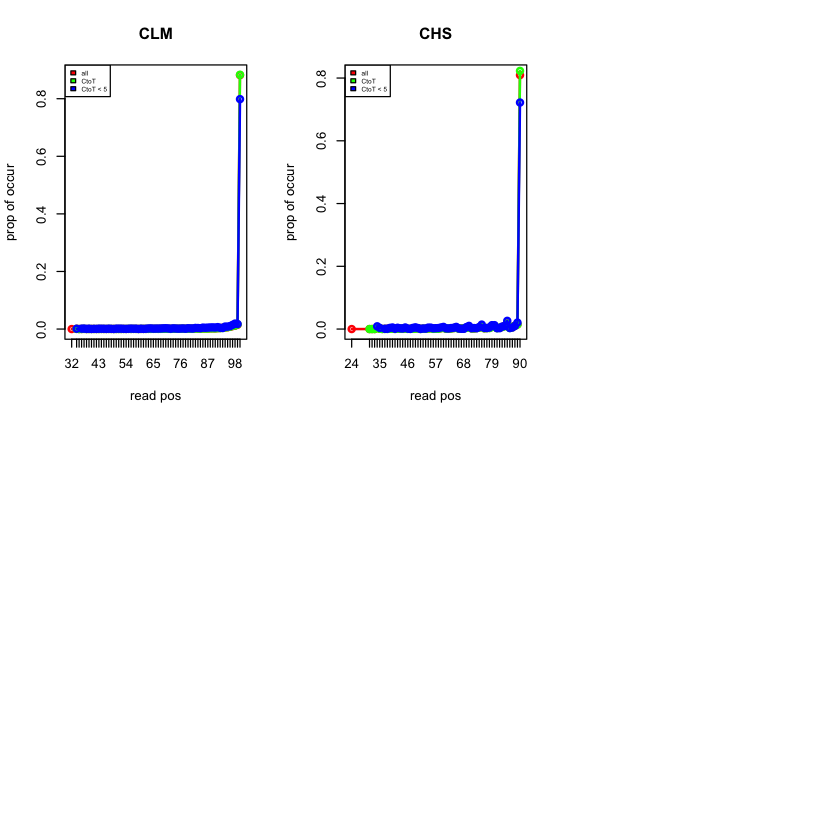

In [77]:
par(mfrow=c(2,3))
for(l in 1:length(tab)){
    tab1 <- tab[[l]]
    read_length <- tab1$V2 + tab1$V3
    indices <- grep("C->T", tab1$V1)
    indices <- c(indices, grep("G->A", tab1$V1))
    read_length_CtoT <- tab1[indices, ]$V2 + tab1[indices, ]$V3 ## read lengths for all C to T
    indices2 <- which(tab1$V2 < 5 | tab1$V3 < 5)
    indices_matched <- intersect(indices, indices2)
    read_length_3 <- (tab1[indices_matched, ]$V2 + tab1[indices_matched, ]$V3)
    plot(table(read_length)/sum(table(read_length)), type="o", col="red", 
     main=paste0(modern_names[l]), xlab="read pos", ylab="prop of occur")
    points(table(read_length_CtoT)/sum(table(read_length_CtoT)), type="o", col="green")
    points(table(read_length_3)/ sum(table(read_length_3)), type="o", col="blue")
    legend("topleft", fill=c("red", "green", "blue"), legend = c("all", "CtoT", "CtoT < 5"), cex=0.5)
    cat("we are at sample", l, "\n")
}

### RISE Ancient DNA (Fragmentation vs c to T)

In [79]:

files <- list.files("../data/RISE_data/")
dir <- "../data/RISE_data/"
tab <- list()
for(l in files){
    tab[[l]] <- read.csv(paste0(dir, l), header=FALSE)
    cat("We are at sample", l, "\n")
}

We are at sample RISE00.q30.csv 
We are at sample RISE109.q30.csv 
We are at sample RISE150.q30.csv 
We are at sample RISE154.q30.csv 
We are at sample RISE175.q30.csv 
We are at sample RISE179.q30.csv 
We are at sample RISE210.q30.csv 
We are at sample RISE247.q30.csv 
We are at sample RISE254.q30.csv 
We are at sample RISE276.q30.csv 
We are at sample RISE349.q30.csv 
We are at sample RISE371.q30.csv 
We are at sample RISE373.q30.csv 
We are at sample RISE374.q30.csv 
We are at sample RISE431.q30.csv 
We are at sample RISE434.q30.csv 
We are at sample RISE435.q30.csv 
We are at sample RISE436.q30.csv 
We are at sample RISE446.q30.csv 
We are at sample RISE47.q30.csv 
We are at sample RISE479.q30.csv 
We are at sample RISE480.q30.csv 
We are at sample RISE483.q30.csv 
We are at sample RISE484.q30.csv 
We are at sample RISE486.q30.csv 
We are at sample RISE487.q30.csv 
We are at sample RISE489.q30.csv 
We are at sample RISE559.q30.csv 
We are at sample RISE560.q30.csv 
We are at sample

In [80]:
files <- list.files("../data/RISE_data/")
length(files)

[1] 42

we are at sample 1 
we are at sample 2 
we are at sample 3 
we are at sample 4 
we are at sample 5 
we are at sample 6 
we are at sample 7 
we are at sample 8 
we are at sample 9 
we are at sample 10 
we are at sample 11 


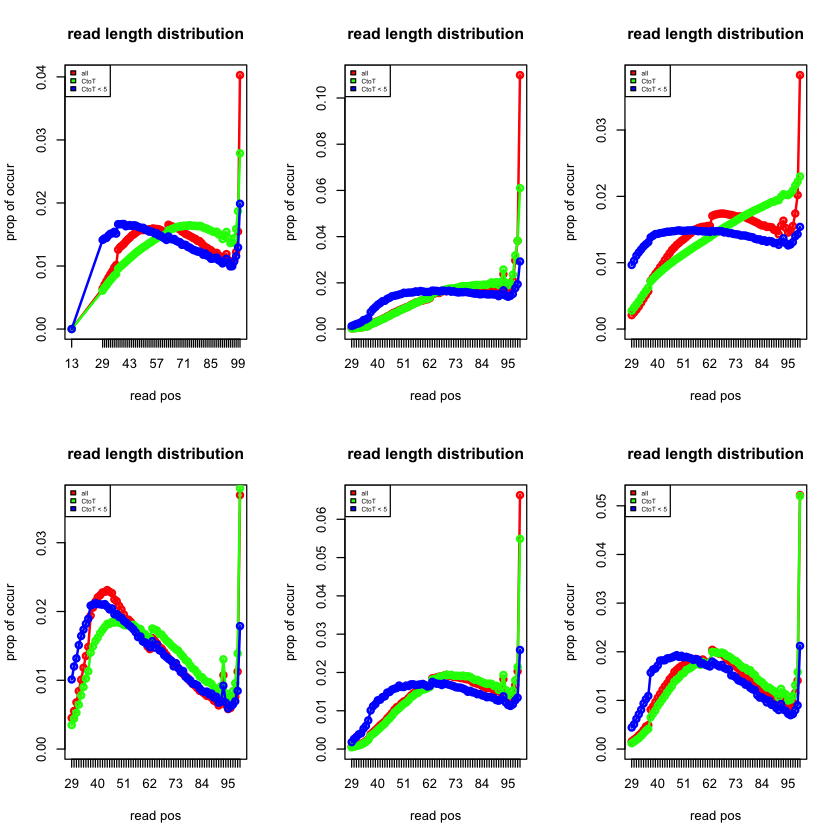

we are at sample 12 
we are at sample 13 
we are at sample 14 
we are at sample 15 
we are at sample 16 
we are at sample 17 


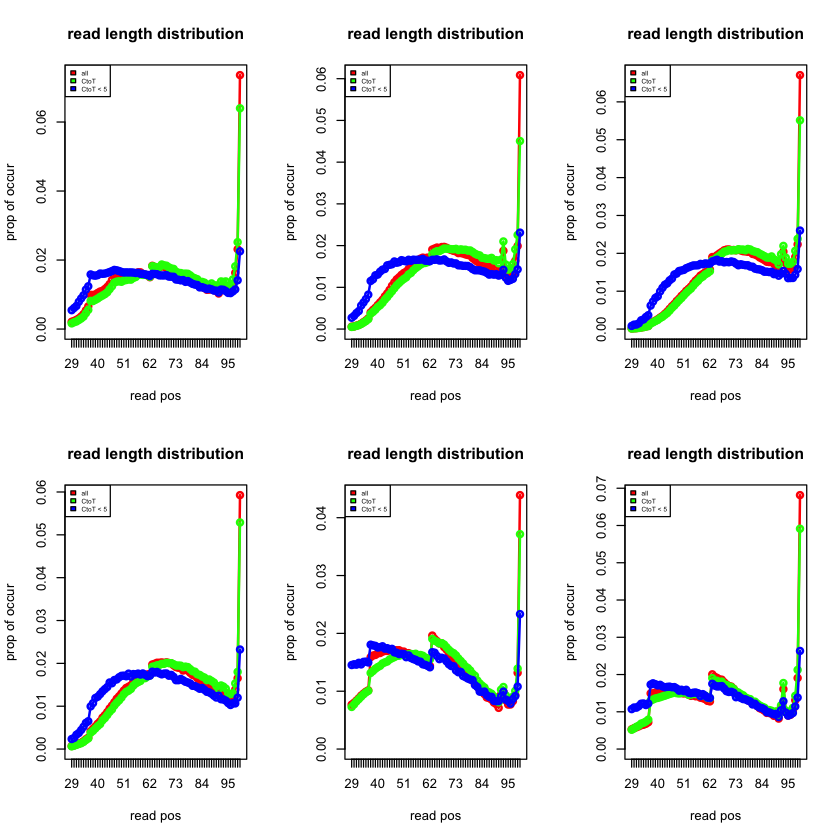

we are at sample 18 
we are at sample 19 
we are at sample 20 
we are at sample 21 
we are at sample 22 
we are at sample 23 


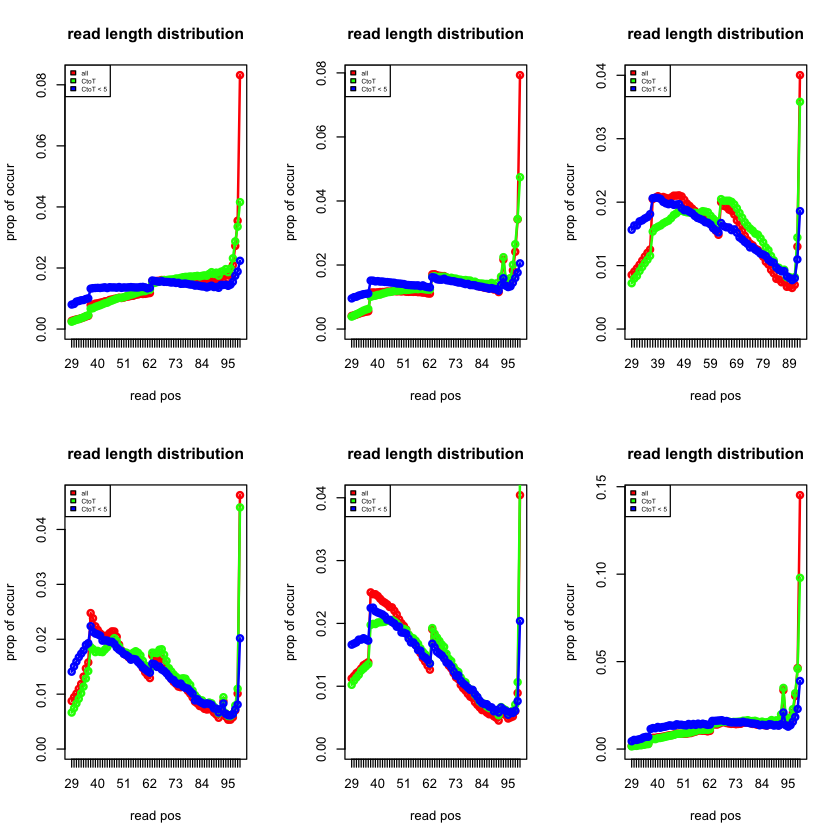

we are at sample 24 
we are at sample 25 
we are at sample 26 
we are at sample 27 
we are at sample 28 
we are at sample 29 


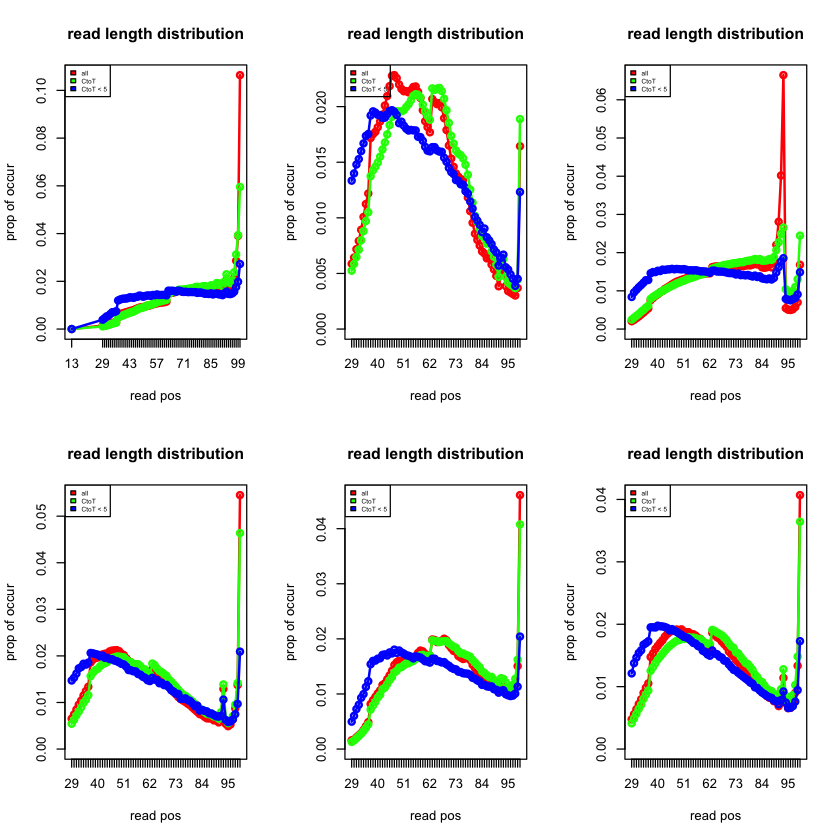

we are at sample 30 
we are at sample 31 
we are at sample 32 
we are at sample 33 
we are at sample 34 
we are at sample 35 


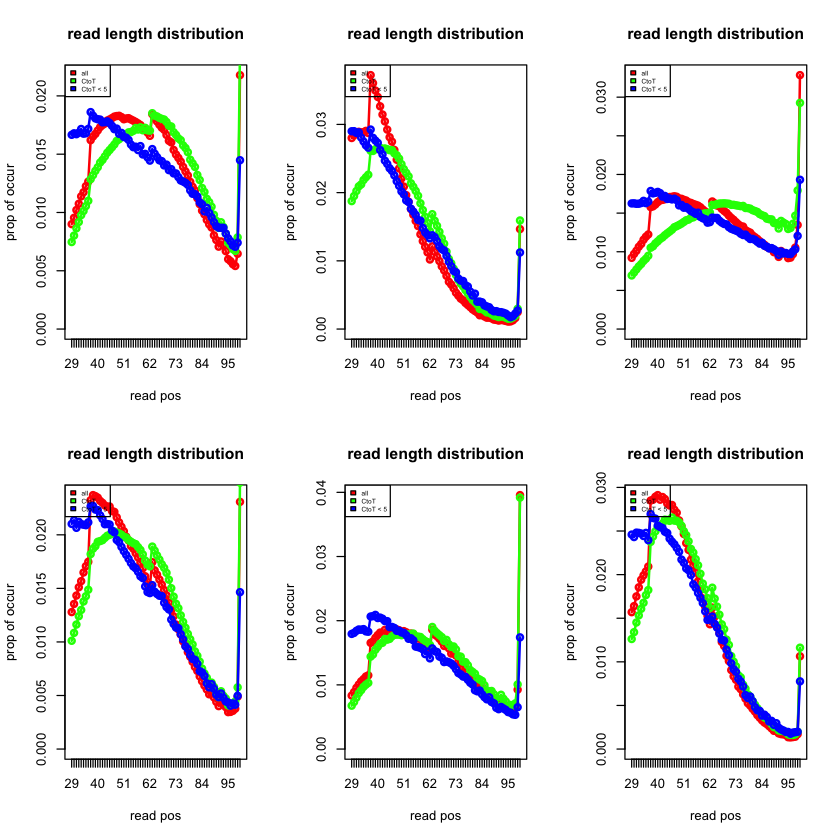

we are at sample 36 
we are at sample 37 
we are at sample 38 
we are at sample 39 
we are at sample 40 
we are at sample 41 


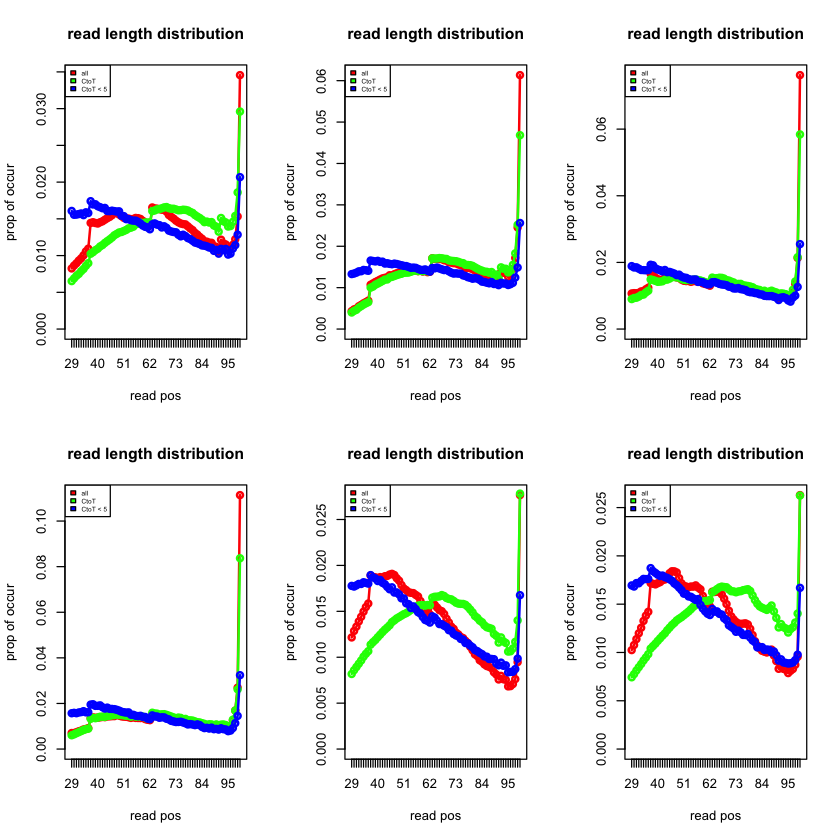

we are at sample 42 


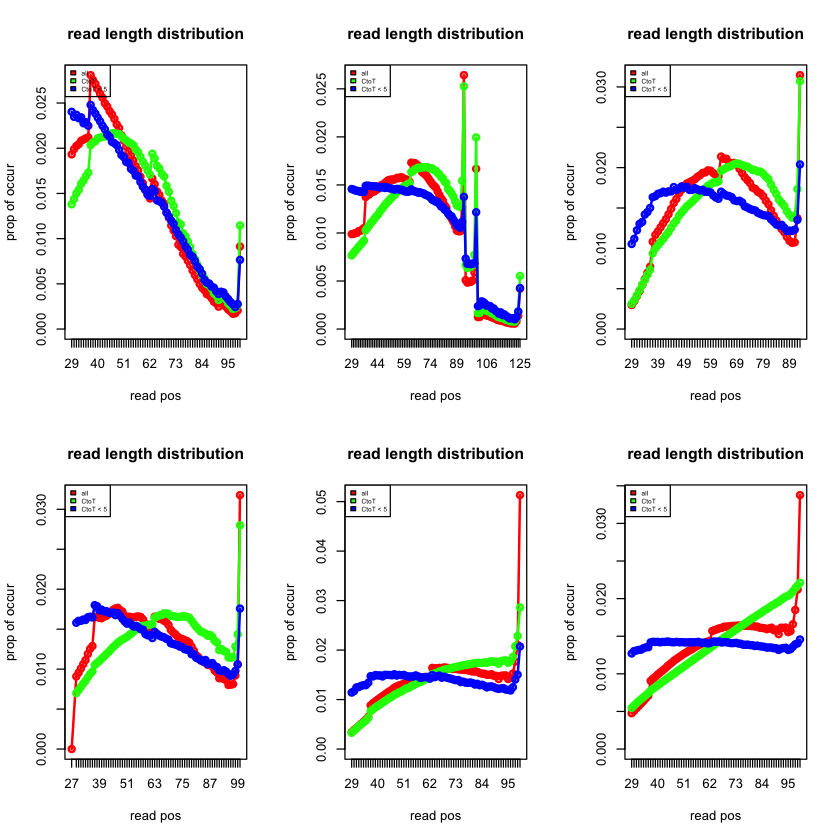

In [81]:
par(mfrow=c(2,3))
for(l in 1:length(tab)){
    tab1 <- tab[[l]]
    read_length <- tab1$V2 + tab1$V3
    indices <- grep("C->T", tab1$V1)
    indices <- c(indices, grep("G->A", tab1$V1))
    read_length_CtoT <- tab1[indices, ]$V2 + tab1[indices, ]$V3 ## read lengths for all C to T
    indices2 <- which(tab1$V2 < 5 | tab1$V3 < 5)
    indices_matched <- intersect(indices, indices2)
    read_length_3 <- (tab1[indices_matched, ]$V2 + tab1[indices_matched, ]$V3)
    plot(table(read_length)/sum(table(read_length)), type="o", col="red", 
     main="read length distribution", xlab="read pos", ylab="prop of occur")
    points(table(read_length_CtoT)/sum(table(read_length_CtoT)), type="o", col="green")
    points(table(read_length_3)/ sum(table(read_length_3)), type="o", col="blue")
    legend("topleft", fill=c("red", "green", "blue"), legend = c("all", "CtoT", "CtoT < 5"), cex=0.5)
    cat("we are at sample", l, "\n")
}

## Conclusions 

- We find different patterns of read length distributions for all mutations, C to T and C to T at the ends (damage patterns) for the different sources of samples.

- We find the length of the reads to be around 100 for most sources (RISE, HGDP and Lindo ancients and moderns), but we find that not to hold for the Gosling data and for the Sardinia data. Sardinia data are typically shorter.

- We generally find for ancient samples, the damage patterns (C to T at the ends of reads) have read distributions having higher probabilities at the shorter values of read lengths compared to the other cases (C to T and all patterns respectively).

- For modern samples, we find not too much variation in read length distributions for the three scenarios -  C to T at ends (damage), C to T and all mutations.

- The patterns for Gosling controls is very messy and for the Sardinian samples, a few of them seem to be similar to ancients whereas a few similar to moderns.

